In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [5]:
df = pd.read_csv('ds_salaries.csv')

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df.nunique() 

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [11]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [12]:
#drop the rows with low amount of jobs values
df2 = pd.read_csv('ds_salaries.csv')
job_title_counts = df2['job_title'].value_counts()
mask = df2['job_title'].isin(job_title_counts.index[job_title_counts < 10])
df_filtered = df2[~mask]
df_filtered['job_title'].value_counts()

Data Engineer                               1040
Data Scientist                               840
Data Analyst                                 612
Machine Learning Engineer                    289
Analytics Engineer                           103
Data Architect                               101
Research Scientist                            82
Applied Scientist                             58
Data Science Manager                          58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
BI Data Analyst                               15
Business Data Analyst                         15
Data Specialist                               14
BI Developer        

In [13]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552 entries, 1 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3552 non-null   int64 
 1   experience_level    3552 non-null   object
 2   employment_type     3552 non-null   object
 3   job_title           3552 non-null   object
 4   salary              3552 non-null   int64 
 5   salary_currency     3552 non-null   object
 6   salary_in_usd       3552 non-null   int64 
 7   employee_residence  3552 non-null   object
 8   remote_ratio        3552 non-null   int64 
 9   company_location    3552 non-null   object
 10  company_size        3552 non-null   object
dtypes: int64(4), object(7)
memory usage: 333.0+ KB


In [14]:
df_filtered.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3552.00000,3.552000e+03,3552.000000,3552.000000
mean,2022.38964,1.848630e+05,139018.974381,45.523649
std,0.67517,6.586336e+05,62198.328617,48.705652
min,2020.00000,6.000000e+03,5679.000000,0.000000
25%,2022.00000,1.000000e+05,99000.000000,0.000000
50%,2022.00000,1.392500e+05,135000.000000,0.000000
75%,2023.00000,1.800000e+05,177125.000000,100.000000
max,2023.00000,3.040000e+07,450000.000000,100.000000


In [15]:
df_filtered.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [16]:
df_filtered.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L


In [17]:
df_filtered["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [18]:
df_filtered["employment_type"].unique()

array(['CT', 'FT', 'PT', 'FL'], dtype=object)

In [19]:
df = df_filtered.copy()

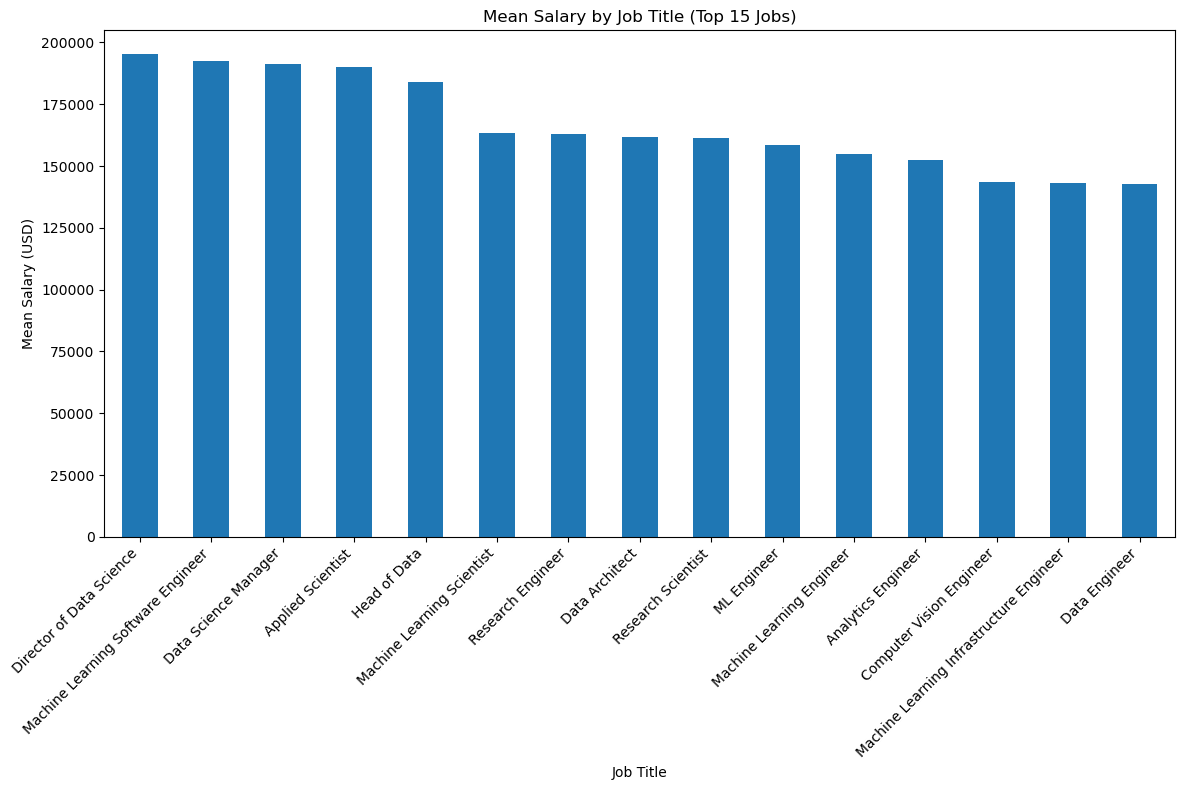

In [20]:
# Group the data by job title and calculate the mean salary
mean_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the data in descending order by mean salary and select the top 15 job titles
top_15_jobs = mean_salary_by_title.sort_values(ascending=False).head(15)

# Create a wider bar plot to visualize the mean salary by job title for the top 15 jobs
plt.figure(figsize=(12, 8))
top_15_jobs.plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Job Title (Top 15 Jobs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

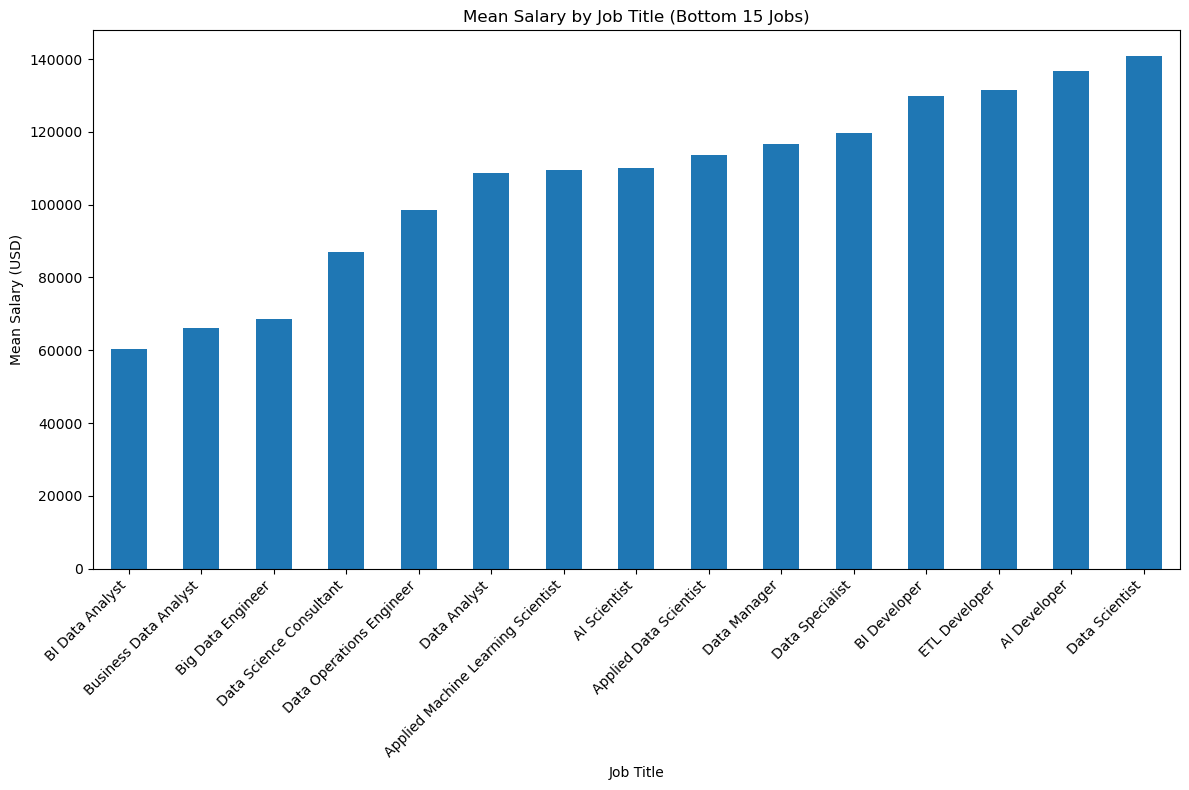

In [21]:
# Group the data by job title and calculate the mean salary
mean_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the data in descending order by mean salary and select the top 15 job titles
top_15_jobs = mean_salary_by_title.sort_values(ascending=True).head(15)

# Create a wider bar plot to visualize the mean salary by job title for the top 15 jobs
plt.figure(figsize=(12, 8))
top_15_jobs.plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Job Title (Bottom 15 Jobs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

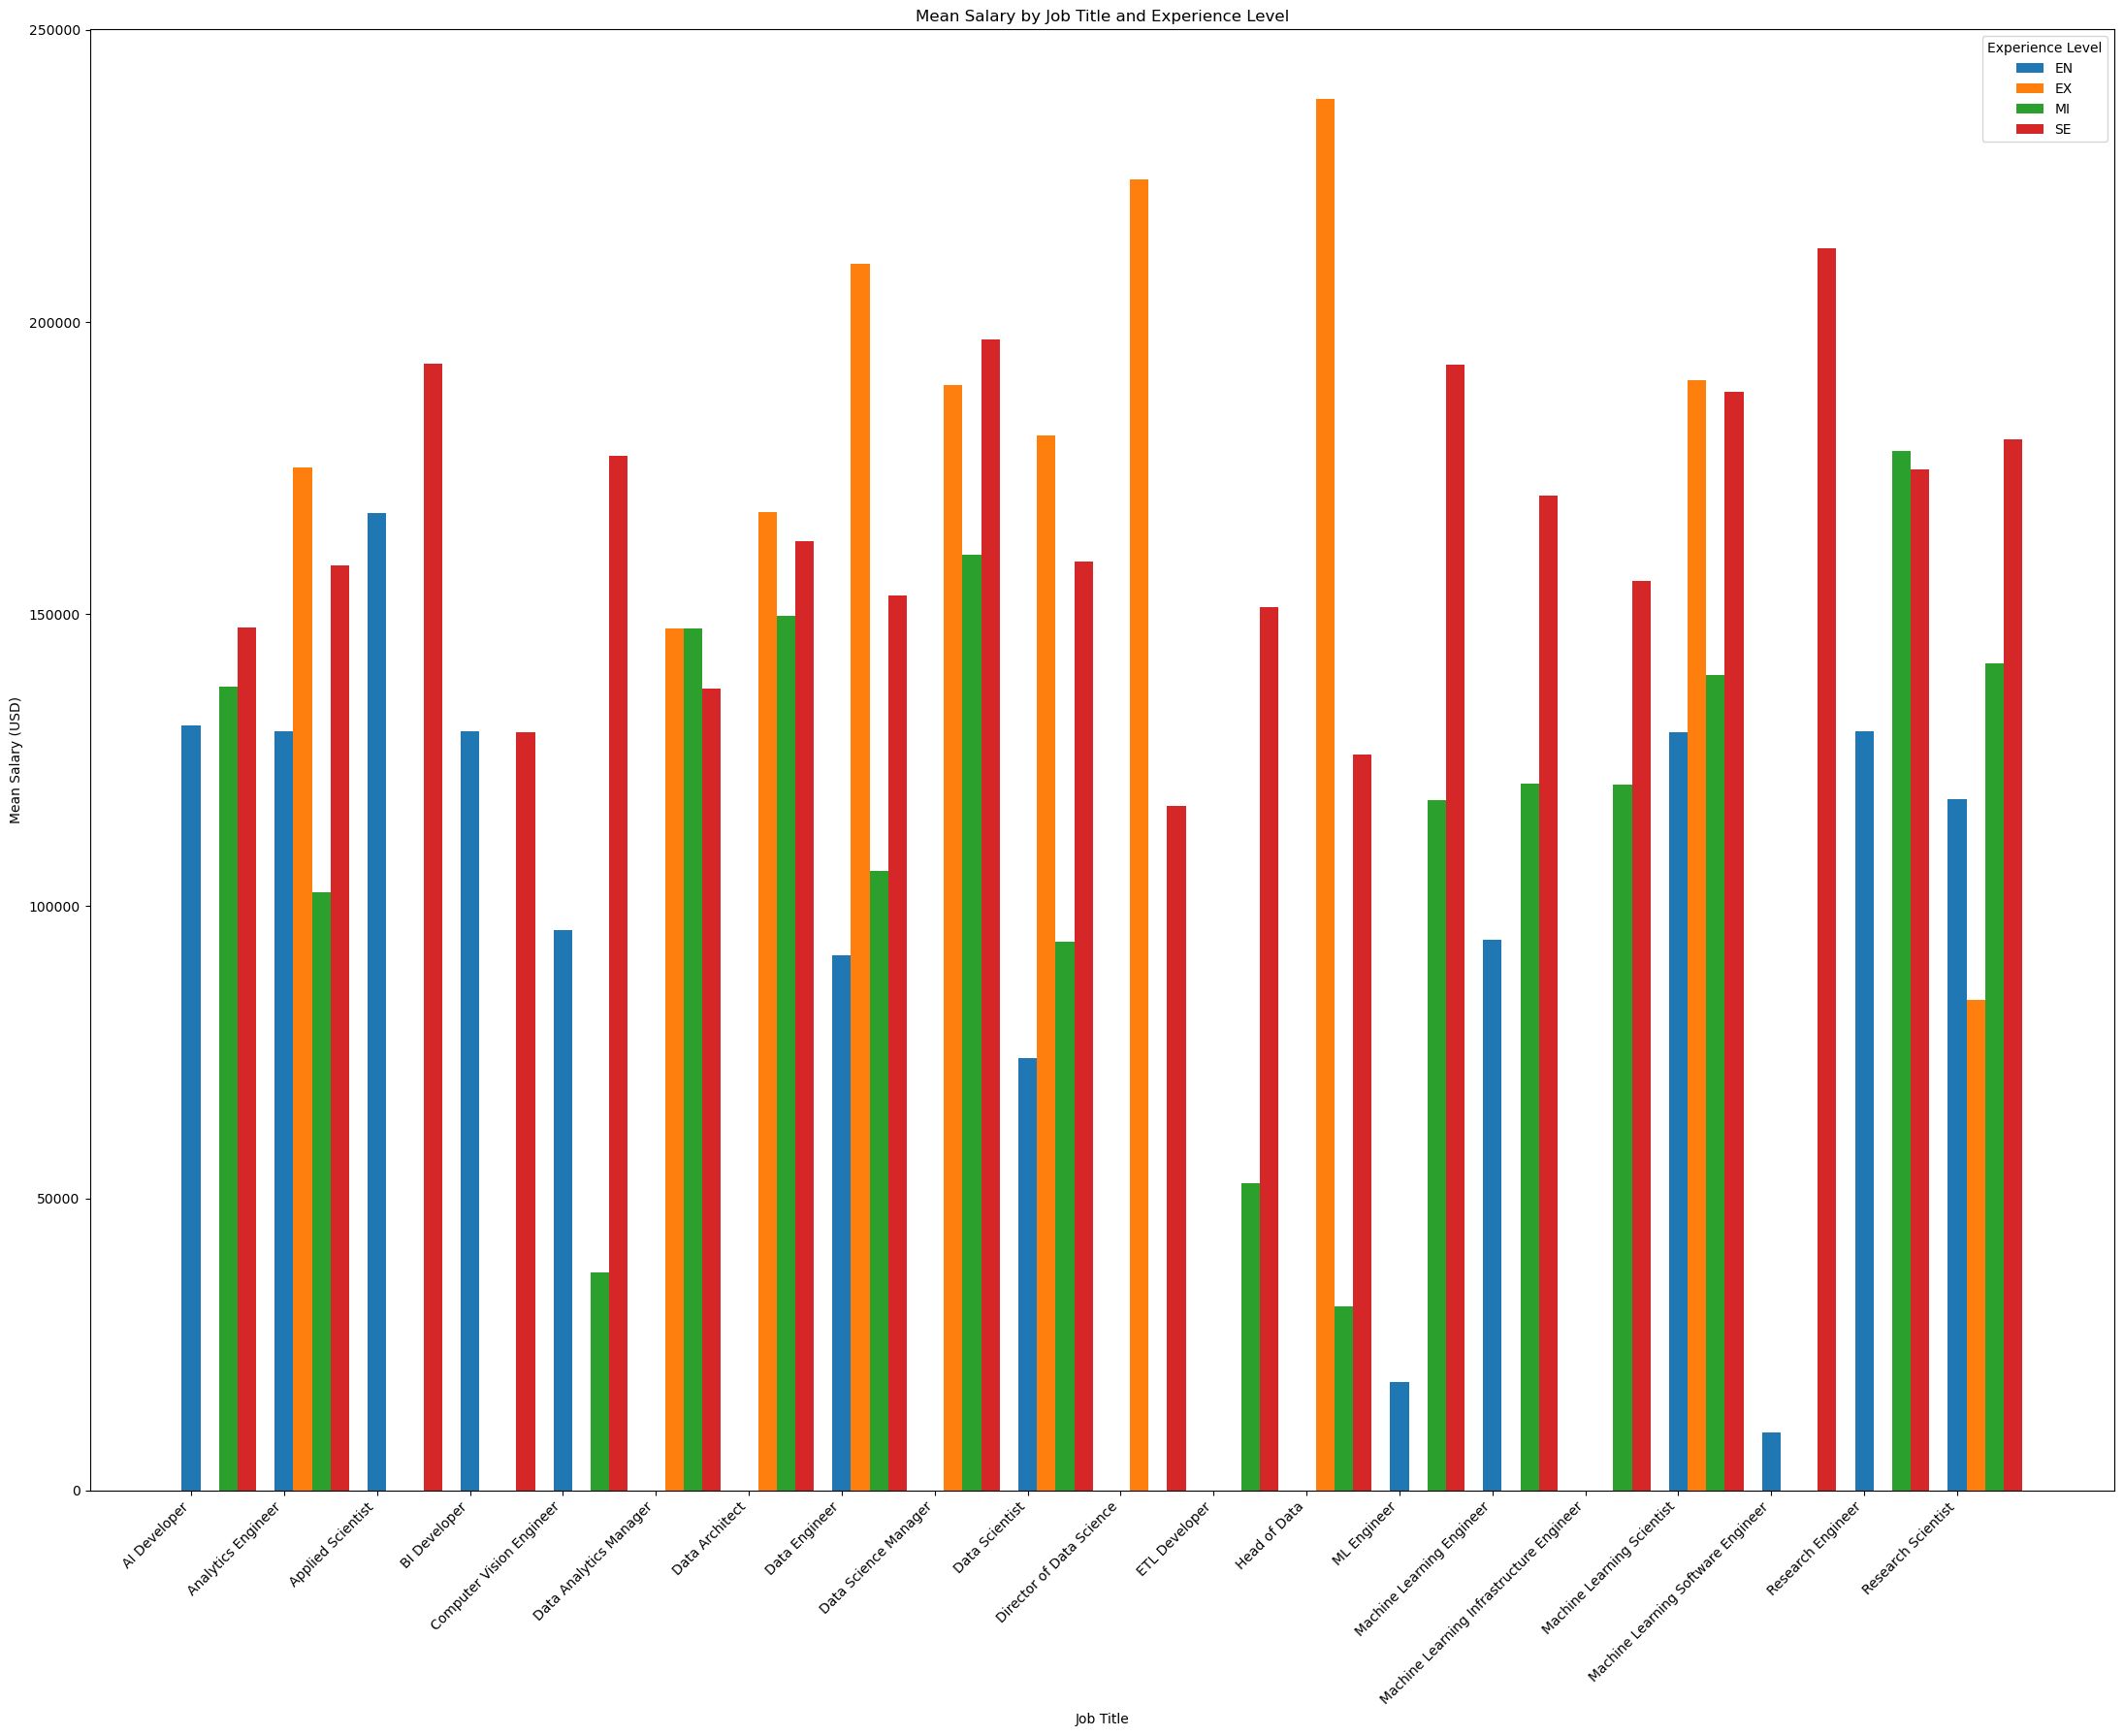

In [22]:
# Group the data by job title and calculate the mean salary
mean_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the data in descending order by mean salary and select the top 20 job titles
top_20_jobs = mean_salary_by_title.sort_values(ascending=False).head(20)

# Filter the original DataFrame to include only the top 20 job titles
df_filtered = df[df['job_title'].isin(top_20_jobs.index)]

# Group the filtered data by job title and experience level, and calculate the mean salary
mean_salary_by_title_exp = df_filtered.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()

# Reset the index to flatten the grouped DataFrame
mean_salary_by_title_exp = mean_salary_by_title_exp.reset_index()

# Pivot the data to create separate columns for each experience level
pivot_data = mean_salary_by_title_exp.pivot(index='job_title', columns='experience_level', values='salary_in_usd')

# Set the width of each bar
total_bars = len(pivot_data)
bar_width = 0.8 / len(pivot_data.columns)  # Adjust the width of each bar

# Get the job titles and experience levels
job_titles = pivot_data.index
experience_levels = pivot_data.columns

# Set the positions of the bars on the x-axis
x = np.arange(len(job_titles))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(22, 18))

# Create a grouped bar plot for each experience level
for i, exp_level in enumerate(experience_levels):
    salary_values = pivot_data[exp_level]
    ax.bar(x + i * bar_width, salary_values, bar_width, label=exp_level)

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(job_titles, rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Job Title')
ax.set_ylabel('Mean Salary (USD)')
ax.set_title('Mean Salary by Job Title and Experience Level')

# Add a legend
ax.legend(experience_levels, title='Experience Level')

# Display the plot
plt.tight_layout()
plt.show()

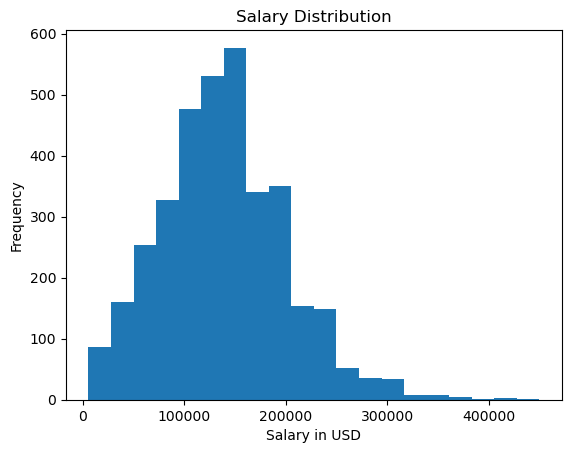

In [23]:
plt.hist(df['salary_in_usd'], bins=20)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

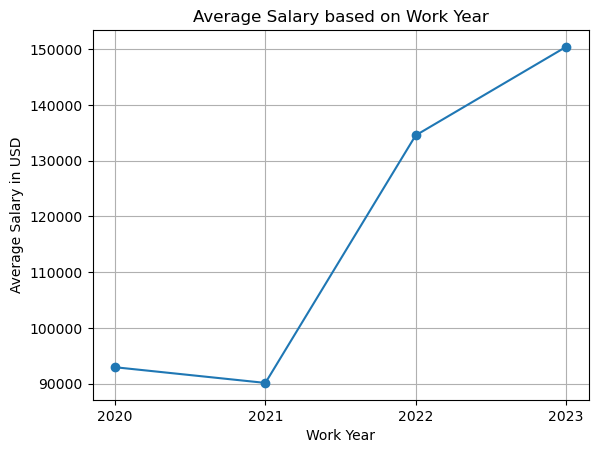

In [24]:
# Filter the data for the four unique work years
work_years = [2020, 2021, 2022, 2023]
filtered_data = df[df['work_year'].isin(work_years)]

# Group the data by work year and calculate the average salary
average_salary = filtered_data.groupby('work_year')['salary_in_usd'].mean()

# Plot the graph
plt.plot(average_salary.index, average_salary.values, marker='o')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary based on Work Year')
plt.xticks(average_salary.index)
plt.grid(True)
plt.show()

In [25]:
#models to add somehow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Transform data using LabelEncoder
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df_filtered[cols]=df_filtered[cols].apply(LabelEncoder().fit_transform)

# Create X, y
X = df_filtered.drop(["salary_in_usd"], axis=1)
y = df_filtered["salary_in_usd"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 1 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           2784 non-null   int64
 1   experience_level    2784 non-null   int32
 2   employment_type     2784 non-null   int32
 3   job_title           2784 non-null   int32
 4   salary              2784 non-null   int64
 5   salary_currency     2784 non-null   int32
 6   salary_in_usd       2784 non-null   int64
 7   employee_residence  2784 non-null   int32
 8   remote_ratio        2784 non-null   int64
 9   company_location    2784 non-null   int32
 10  company_size        2784 non-null   int32
dtypes: int32(7), int64(4)
memory usage: 184.9 KB


Epoch [1/50], Train Loss: 25955487744.0000, Val Loss: 24898578432.0000
Epoch [2/50], Train Loss: 25955465216.0000, Val Loss: 24898557952.0000
Epoch [3/50], Train Loss: 25955442688.0000, Val Loss: 24898537472.0000
Epoch [4/50], Train Loss: 25955418112.0000, Val Loss: 24898516992.0000
Epoch [5/50], Train Loss: 25955397632.0000, Val Loss: 24898494464.0000
Epoch [6/50], Train Loss: 25955375104.0000, Val Loss: 24898471936.0000
Epoch [7/50], Train Loss: 25955352576.0000, Val Loss: 24898449408.0000
Epoch [8/50], Train Loss: 25955332096.0000, Val Loss: 24898428928.0000
Epoch [9/50], Train Loss: 25955309568.0000, Val Loss: 24898406400.0000
Epoch [10/50], Train Loss: 25955287040.0000, Val Loss: 24898381824.0000
Epoch [11/50], Train Loss: 25955264512.0000, Val Loss: 24898359296.0000
Epoch [12/50], Train Loss: 25955237888.0000, Val Loss: 24898332672.0000
Epoch [13/50], Train Loss: 25955213312.0000, Val Loss: 24898306048.0000
Epoch [14/50], Train Loss: 25955184640.0000, Val Loss: 24898279424.0000
E

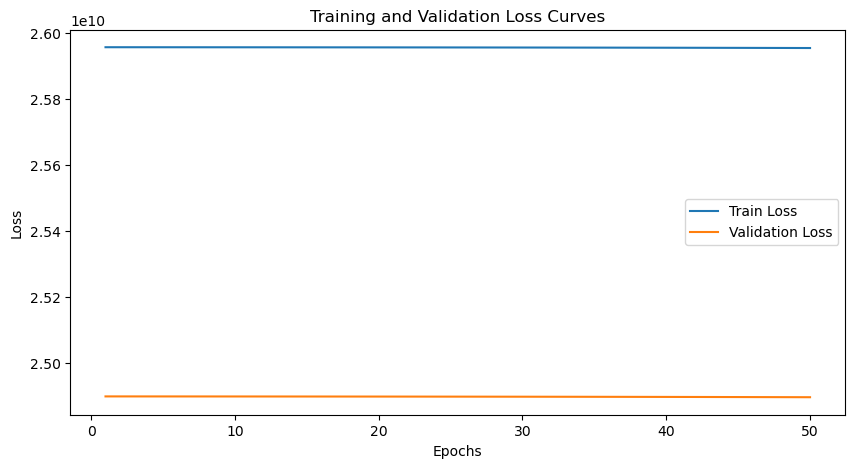

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN(X_train_scaled.shape[1])

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and validation losses
train_losses = []
val_losses = []

# Train the model and record losses
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Record training loss
    train_losses.append(loss.item())

    # Calculate validation loss
    with torch.no_grad():
        y_pred_val = model(X_test_tensor)
        val_loss = criterion(y_pred_val, y_test_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [40]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 2609644620.1155186
Mean Absolute Error (MAE): 40435.06109825557
R-squared Score: 0.2681229580688652

Results for Decision Tree:
Mean Squared Error (MSE): 15440869.179533213
Mean Absolute Error (MAE): 787.983842010772
R-squared Score: 0.9956695951729005

Results for Random Forest:
Mean Squared Error (MSE): 55686451.52723035
Mean Absolute Error (MAE): 1152.0404129263914
R-squared Score: 0.9843826875486261

Results for SVR:
Mean Squared Error (MSE): 3564389748.307575
Mean Absolute Error (MAE): 47140.26068895211
R-squared Score: 0.00036387898458989376

Results for XGBoost:
Mean Squared Error (MSE): 54978560.21952131
Mean Absolute Error (MAE): 976.3271764895646
R-squared Score: 0.984581216264874

Results for LightGBM:
Mean Squared Error (MSE): 92064787.27687445
Mean Absolute Error (MAE): 1779.527170944997
R-squared Score: 0.9741803525051486

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 65492460.06925873
Mean Abso

In [41]:
accuracy

[0.2681229580688652,
 0.9956695951729005,
 0.9843826875486261,
 0.00036387898458989376,
 0.984581216264874,
 0.9741803525051486,
 0.9816325841554011,
 0.9392530025327813,
 0.9162967758870395,
 0.9948903426901412]

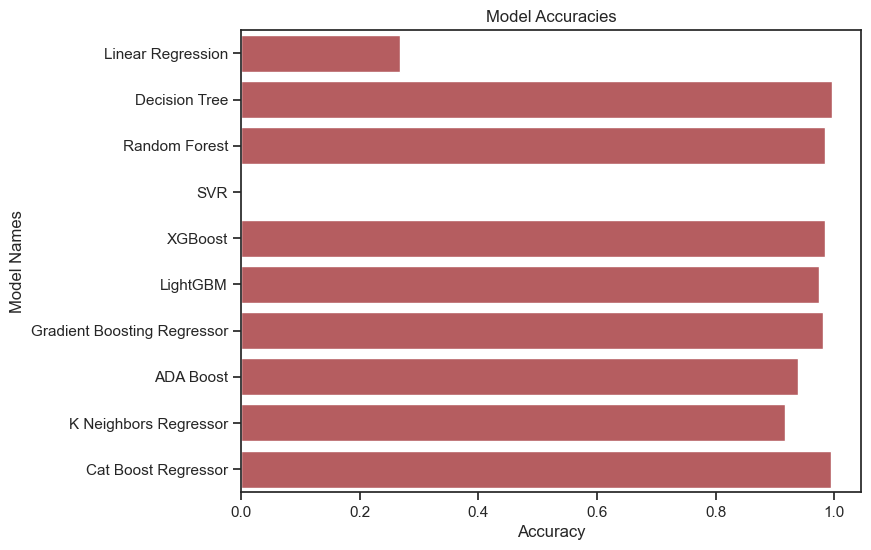

In [42]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

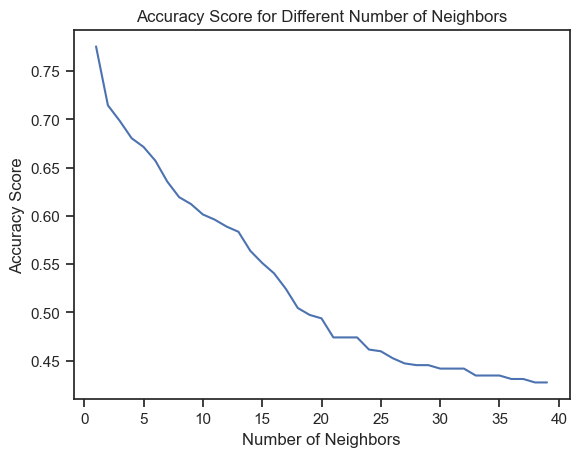

In [35]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
def check_neighbors(X_train, y_train, X_test, y_test, k):
    #create a list of scores
    scores = []
    #create a list of neighbors
    neighbors = []
    #create a for loop that goes through the range of k
    for i in range(1, k):
        #create a KNN classifier with the current k
        knn = KNeighborsClassifier(n_neighbors=i)
        #fit the model
        knn.fit(X_train, y_train)
        #append the score to the scores list
        scores.append(knn.score(X_test, y_test))
        #append the current k to the neighbors list
        neighbors.append(i)
    #return the scores and neighbors list
    return scores, neighbors

#call the function
scores, neighbors = check_neighbors(X_train, y_train, X_test, y_test, 40)

#plot the scores
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


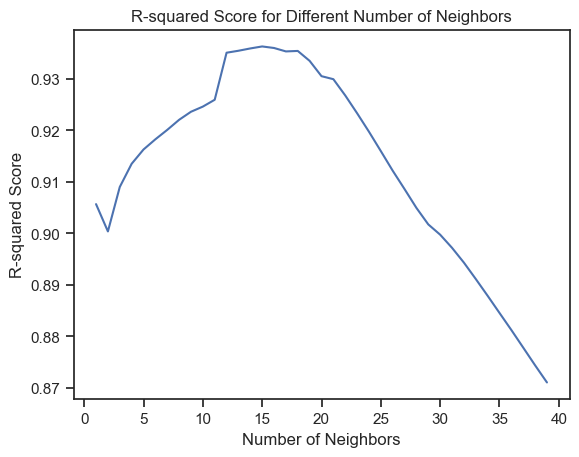

In [43]:
from sklearn.neighbors import KNeighborsRegressor

def check_neighbors(X_train, y_train, X_test, y_test, k):
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)  # Use KNeighborsRegressor
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
        neighbors.append(i)
        
    return scores, neighbors

scores, neighbors = check_neighbors(X_train, y_train, X_test, y_test, 40)
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')  # Since it's a regression task
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()